<a href="https://colab.research.google.com/github/patdring/QuantumML/blob/main/QuantumSVM_IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum Support Vector Machine with Qiskit: Iris Classification Experiment
==========================================================================

Overview
--------

This Jupyter notebook demonstrates a Quantum Support Vector Machine (SVM) experiment for classifying a subset of the Iris dataset. The experiment utilizes Qiskit, a comprehensive quantum computing framework. This README elaborates on the quantum components and steps involved in the experiment.

Quantum Components
------------------

1.  **Qiskit Libraries**: Key libraries from Qiskit, such as `Aer` and `ZZFeatureMap`, are utilized.
2.  **FidelityQuantumKernel**: From `qiskit_machine_learning.kernels`, this quantum kernel is used in the SVM. It defines the quantum feature map and computes the kernel matrix.

Data Preparation and Preprocessing
----------------------------------

*   **Dataset**: The Iris dataset is loaded, but only the first 100 samples are used for a binary classification task.
*   **Dimensionality Reduction**: PCA (Principal Component Analysis) reduces the feature space to 2 dimensions, facilitating visualization and potentially improving model performance.
*   **Standardization**: The data is standardized using `StandardScaler` to normalize the feature distribution.

Quantum Feature Map and Kernel
------------------------------

1.  **Feature Map**: A `ZZFeatureMap` is constructed to encode classical data into quantum states. Its design is crucial for effective data processing in a quantum machine learning context.
2.  **Quantum Kernel**: The `FidelityQuantumKernel` is initialized with the feature map. This kernel is employed in the SVM algorithm and is responsible for computing the similarity between data points in a quantum-enhanced feature space.

Quantum SVM Training and Testing
--------------------------------

*   **Quantum SVM**: An SVM model is created using the `svm.SVC` class from scikit-learn, with the quantum kernel as its kernel function.
*   **Model Training and Evaluation**: The dataset is split into training and testing sets. The SVM model is trained on the training set and evaluated on the testing set.
*   **Accuracy Calculation**: The accuracy of the model is computed using `accuracy_score`, providing a measure of the model's performance.

Visualization of Results
------------------------

*   **Decision Boundary Plot**: A function is defined to plot the decision boundaries of the SVM. This visualization demonstrates how the quantum SVM classifies the data points in the PCA-reduced feature space.
*   **Performance Metrics**: The test accuracy of the model is displayed, offering insights into the effectiveness of the quantum SVM.

Quantum Insights
----------------

This experiment showcases the integration of quantum computing techniques in machine learning, particularly in SVM classification. The quantum feature map and quantum kernel introduce a novel way to process and classify data, harnessing quantum properties like superposition and entanglement, which could potentially offer advantages over classical methods in specific scenarios.

In [1]:
!pip install qiskit
!pip install qiskit_machine_learning
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512576 sha256=64872a346cd27af57022f13fc42b4f0c9400861f276a4fefa417

In [2]:
import qiskit_machine_learning.kernels
dir(qiskit_machine_learning.kernels)

['BaseKernel',
 'FidelityQuantumKernel',
 'FidelityStatevectorKernel',
 'TrainableFidelityQuantumKernel',
 'TrainableFidelityStatevectorKernel',
 'TrainableKernel',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base_kernel',
 'fidelity_quantum_kernel',
 'fidelity_statevector_kernel',
 'trainable_fidelity_quantum_kernel',
 'trainable_fidelity_statevector_kernel',
 'trainable_kernel']

Test Accuracy: 0.55


<ipython-input-16-ceb09ad24d84>:63: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


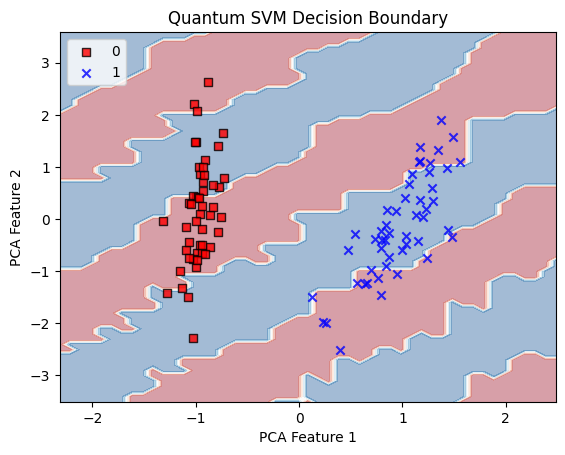

In [16]:
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Added for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the Iris dataset
iris = datasets.load_iris()
X, y = iris.data[:100], iris.target[:100]

# PCA for dimensionality reduction to 2 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Create a quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement='circular')

# Initialize the Fidelity Quantum Kernel
fidelity_quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Quantum SVM using the fidelity quantum kernel
qsvc = svm.SVC(C=0.9, kernel=fidelity_quantum_kernel.evaluate)

# Training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
qsvc.fit(X_train, y_train)
y_pred = qsvc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Define a function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title, resolution=0.1):
    # Set up marker generator and color map
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdBu

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')

    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.title(title)
    plt.legend(loc='upper left')

# Plot decision boundaries
plot_decision_boundaries(X_scaled, y, qsvc, "Quantum SVM Decision Boundary")
plt.show()
